In [1]:
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
#reading the fake and true datasets
fake_news = pd.read_csv('./Datasets/Fake.csv')
true_news = pd.read_csv('./Datasets/True.csv')

In [3]:
print (fake_news.info())
print("\n")
print (true_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


# Preprocessing and Clean

In [4]:
fake_news['output']=0
true_news['output']=1

In [5]:
fake_news.head()

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
fake_news=fake_news.drop(['text','subject','date'],axis=1)
true_news=true_news.drop(['text','subject','date'],axis=1)


In [7]:
true_news.head(5)

,title,output
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [8]:
# Appending True and Fake datasets

frames=[fake_news,true_news]
news_dataset=pd.concat(frames)
news_dataset

,title,output
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorities,1
21415,Vatican upbeat on possibility of Pope Francis ...,1


In [9]:
news_dataset.head(30000)

,title,output
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
6514,Republicans make repealing Obamacare 'first or...,1
6515,Trump fills top jobs for his administration,1
6516,Civil rights activists arrested protesting Tru...,1
6517,Pence: Obamacare replacement to come together ...,1


In [10]:

import re
import string
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
#Creating a copy 
clean_news=news_dataset.copy()

In [12]:
clean_news['news']=clean_news['title'].apply(lambda x:review_cleaning(x))
clean_news.head()

,title,output,news
0,Donald Trump Sends Out Embarrassing New Year’...,0,donald trump sends out embarrassing new year’...
1,Drunk Bragging Trump Staffer Started Russian ...,0,drunk bragging trump staffer started russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,0,sheriff david clarke becomes an internet joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,trump is so obsessed he even has obama’s name...
4,Pope Francis Just Called Out Donald Trump Dur...,0,pope francis just called out donald trump dur...


In [13]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,title,output,news
0,Donald Trump Sends Out Embarrassing New Year’...,0,donald trump sends embarrassing new year’s eve...
1,Drunk Bragging Trump Staffer Started Russian ...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,trump obsessed even obama’s name coded website...
4,Pope Francis Just Called Out Donald Trump Dur...,0,pope francis called donald trump christmas speech


In [14]:
clean_news_new=clean_news[['news','output']]

In [15]:
clean_news_new.head(4)

,news,output
0,donald trump sends embarrassing new year’s eve...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes internet joke thr...,0
3,trump obsessed even obama’s name coded website...,0


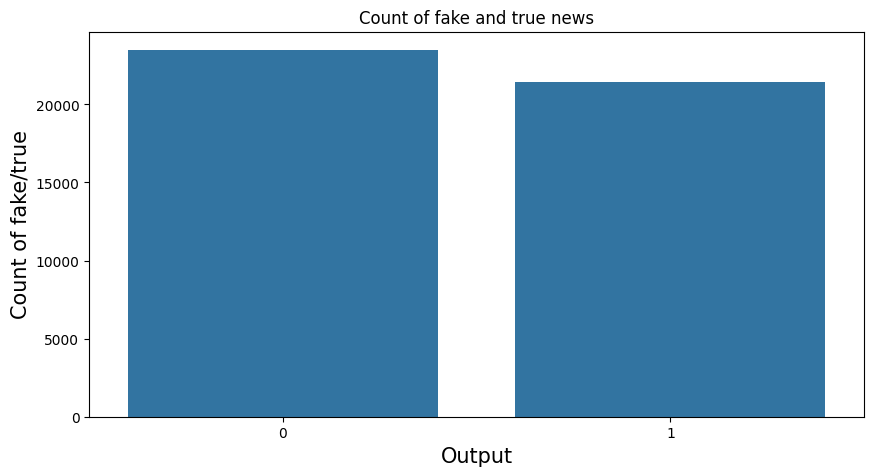

In [16]:
ax=sns.countplot(x="output", data=clean_news_new)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

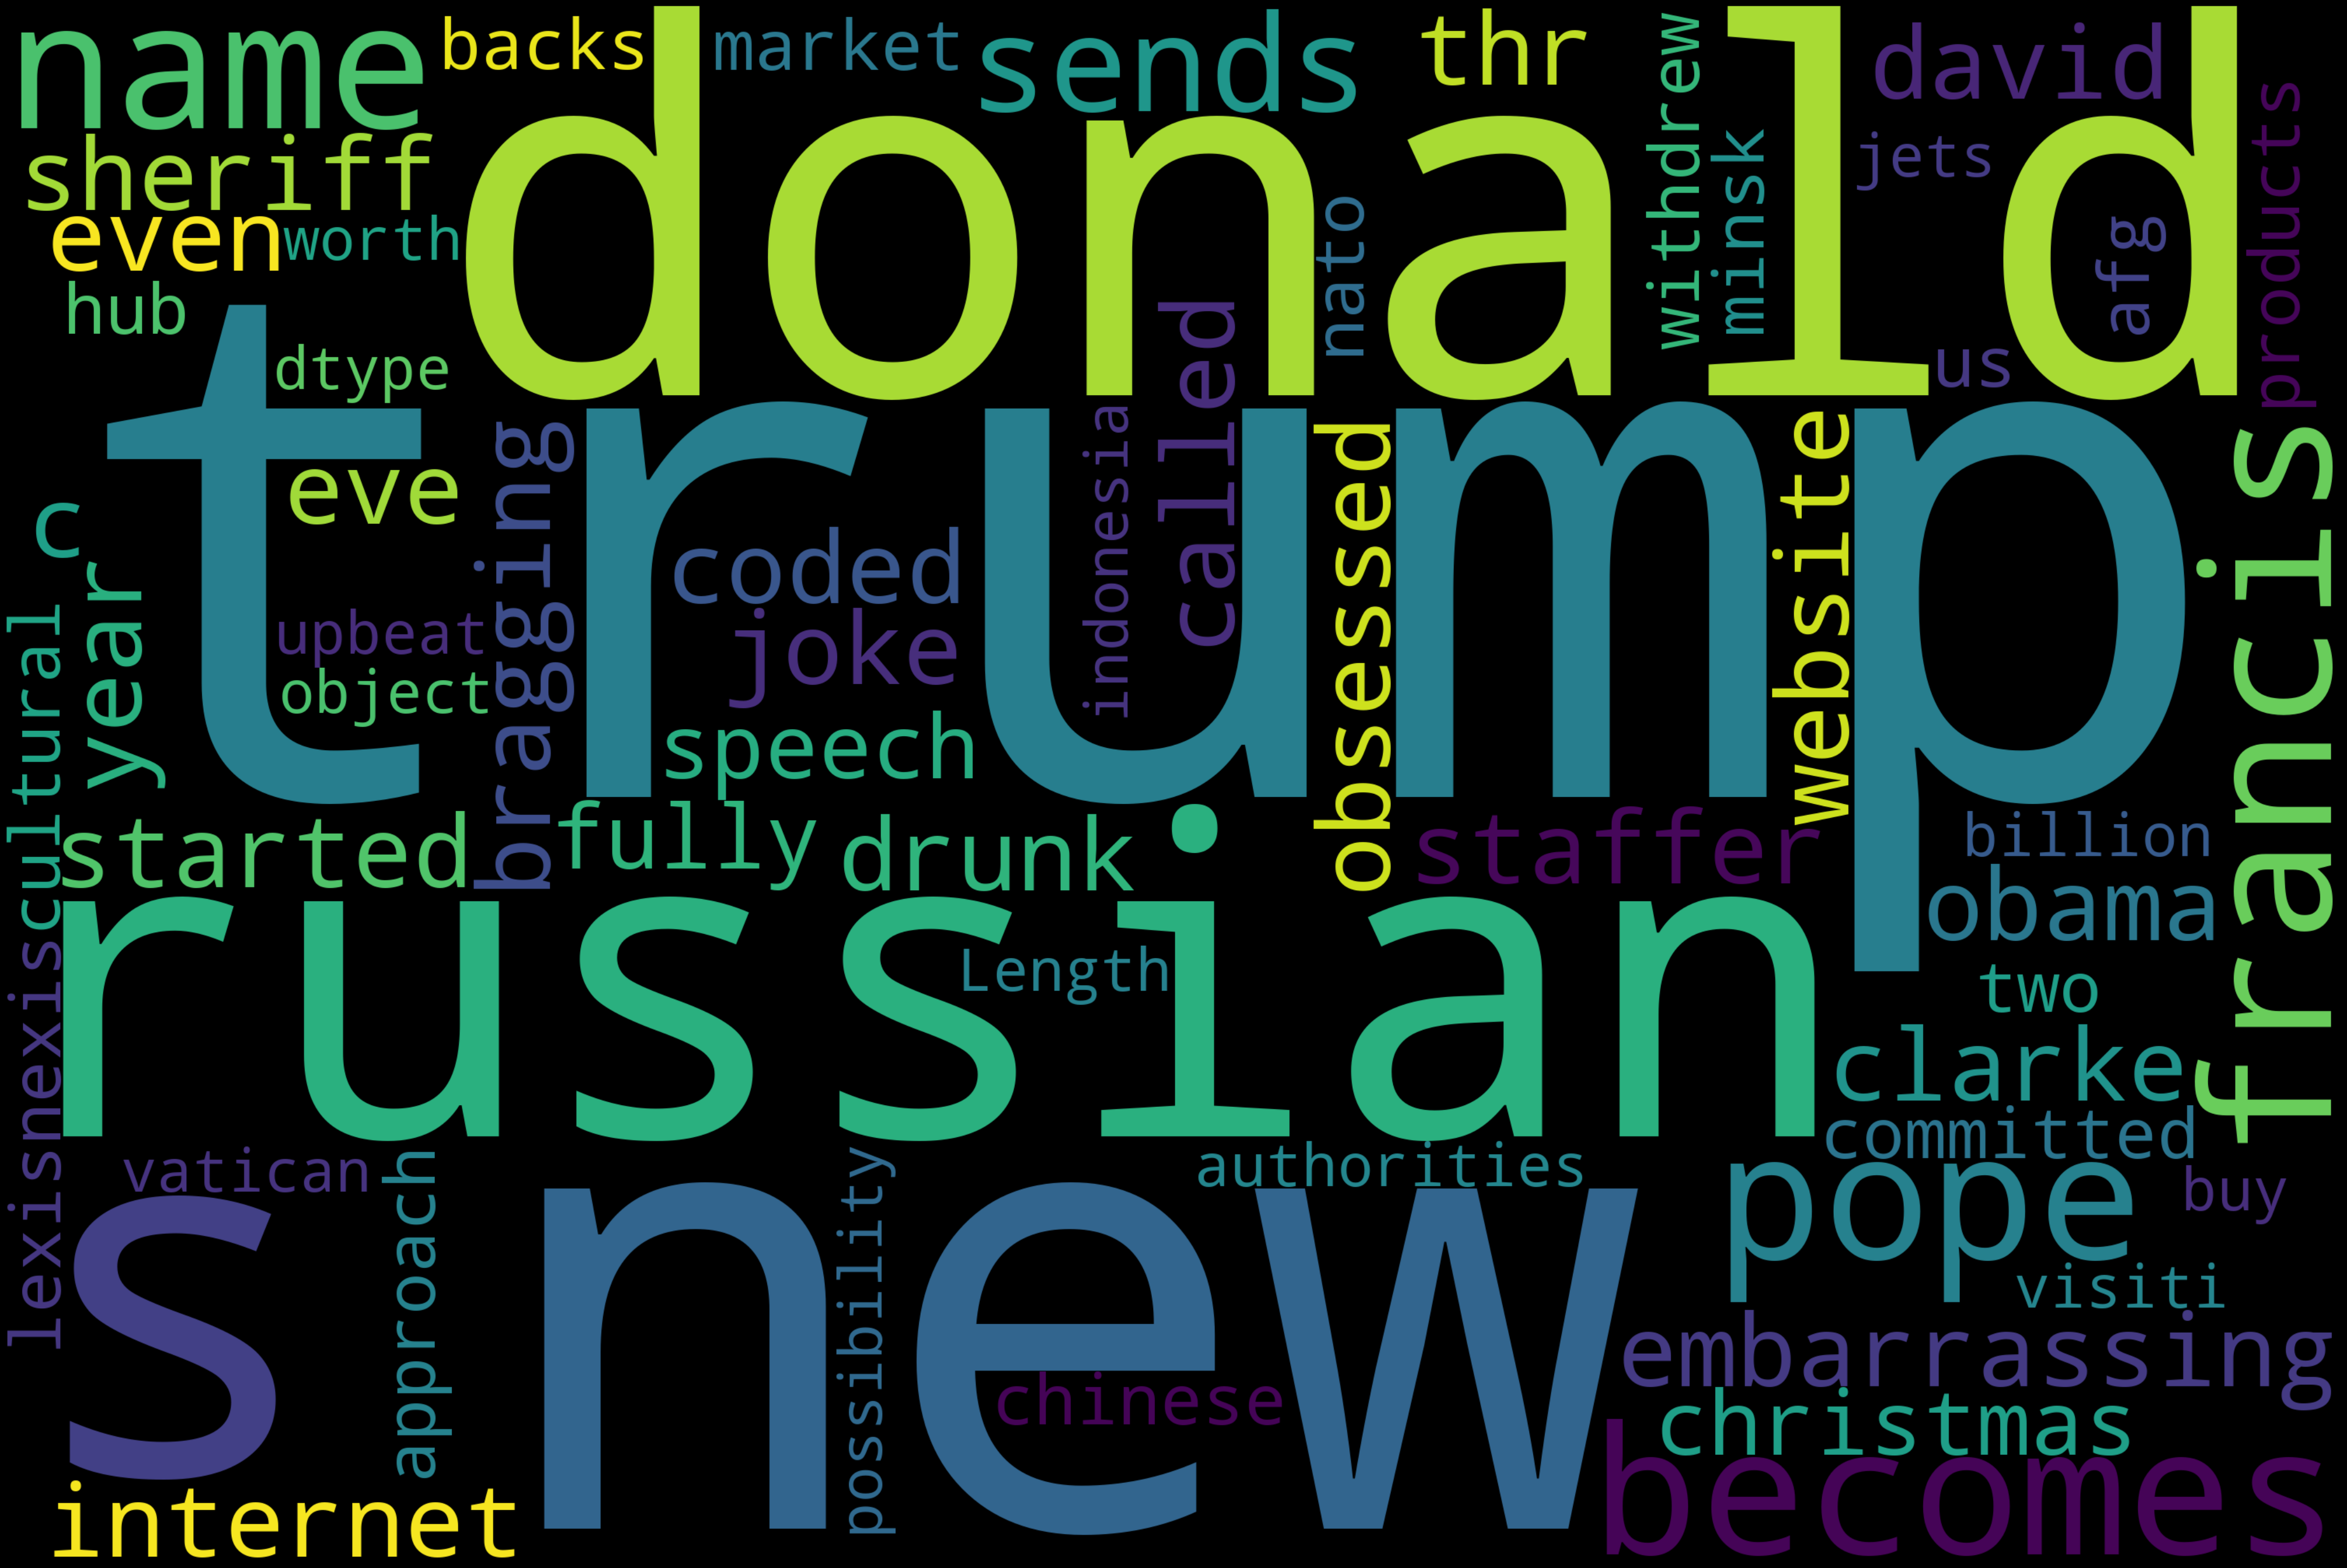

In [17]:
#Wordcloud for Fake and True news

text = clean_news_new["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
#Extracting 'reviews' for processing
news_features=clean_news_new.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas speech


In [19]:
# Stemming & Vectorizing

# Stemming & Vectorizing

In [20]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [21]:
corpus

['donald trump send embarrass new year eve messag disturb',
 'drunk brag trump staffer start russian collus investig',
 'sheriff david clark becom internet joke threaten poke peopl eye',
 'trump obsess even obama name code websit imag',
 'pope franci call donald trump christma speech',
 'racist alabama cop brutal black boy handcuff graphic imag',
 'fresh golf cours trump lash fbi deputi director jame comey',
 'trump said insan racist stuff insid oval offic wit back',
 'former cia director slam trump un bulli openli suggest act like dictat tweet',
 'watch brandnew protrump ad featur much kiss make sick',
 'papa john founder retir figur racism bad busi',
 'watch paul ryan told us care struggl famili live blue state',
 'bad news trump mitch mcconnel say repeal obamacar',
 'watch lindsey graham trash media portray trump kooki forget word',
 'heiress disney empir know gop scam us shred tax bill',
 'tone deaf trump congrat rep scalis lose weight almost die',
 'internet brutal mock disney new

In [22]:
#Getting the target variable
y=clean_news_new['output']

In [23]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23481, 1: 21417})


In [24]:
#Setting up vocabulary size
voc_size=5000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [25]:
#Setting sentence length
sent_length=20

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  734 1477 3921]
 [   0    0    0 ... 1711 1369 2367]
 [   0    0    0 ... 4993 3288 4456]
 ...
 [   0    0    0 ... 3202 3716 1516]
 [   0    0    0 ... 3464 2294 1195]
 [   0    0    0 ... 1074 1711 2056]]


In [26]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [27]:
#Check shape of X and y final
X_final.shape,y_final.shape

((44898, 20), (44898,))

In [28]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [29]:
# Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))


model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
# Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8258 - loss: 0.3583 - val_accuracy: 0.9044 - val_loss: 0.2350
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9399 - loss: 0.1582 - val_accuracy: 0.9255 - val_loss: 0.1811
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9522 - loss: 0.1238 - val_accuracy: 0.9295 - val_loss: 0.1828
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9656 - loss: 0.0943 - val_accuracy: 0.9303 - val_loss: 0.1893
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9734 - loss: 0.0764 - val_accuracy: 0.9293 - val_loss: 0.1960
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9271 - val_loss: 0.2247
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9842 - loss: 0.0475 - val_accuracy: 0.9314 - val_loss: 0.2501
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9871 - loss: 0.0407 - val

In [42]:
# Predicting from test data
y_predi=model1.predict(X_test)

464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [43]:
y_pred=[]
for i in y_predi:
    if(i>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


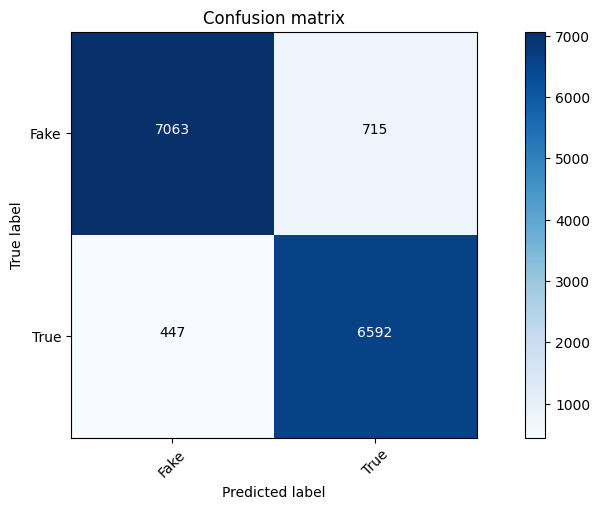

In [46]:



cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [47]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      7778
           1       0.90      0.94      0.92      7039

    accuracy                           0.92     14817
   macro avg       0.92      0.92      0.92     14817
weighted avg       0.92      0.92      0.92     14817



In [48]:
model1.save("model.h5") 

In [49]:
from tensorflow.keras.models import load_model

model = load_model("model.h5")


In [102]:
#Fake News Testing
New= "Scientists discover a secret portal to another dimension beneath the Eiffel Tower, sparking global curiosity and government investigations"


In [109]:
def Stemming(text):
    stop_words = set(stopwords.words("english"))
    #Performing stemming on the review dataframe
    ps = PorterStemmer()

    #splitting and adding the stemmed words except stopwords


    news = re.sub('[^a-zA-Z]', ' ',str(text))
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)

    return news



In [111]:
def one_hot_encode_embedding(text):
    #Setting up vocabulary size
    voc_size=5000

    #One hot encoding 
    onehot_encode=[one_hot(text,voc_size)] 
    #Setting sentence length
    sent_length=20

    #Padding the sentences
    embedded_docs=pad_sequences(onehot_encode,padding='pre',maxlen=sent_length)
    return embedded_docs

In [105]:
onehot_for_new

[[2483,
  2317,
  354,
  2123,
  4779,
  1389,
  4952,
  3888,
  2424,
  4390,
  3049,
  4573,
  1324,
  2367]]

In [106]:
#Setting sentence length
sent_length=20

#Padding the sentences
embedded_docs_new=pad_sequences(onehot_for_new,padding='pre',maxlen=sent_length)
print(embedded_docs_new)

[[   0    0    0    0    0    0 2483 2317  354 2123 4779 1389 4952 3888
  2424 4390 3049 4573 1324 2367]]


In [112]:
def prediction(model,embedded_docs):
    Prediction=model.predict(embedded_docs_new)
    if(Prediction<0.5):
        return "False"
    else:
        return "True"


In [107]:
Prediction=model.predict(embedded_docs_new)
if(Prediction<0.5):
    print("False")
else:
    print("True")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
False


In [108]:
Prediction

array([[1.8796296e-06]], dtype=float32)